In [2]:
### Import packages for preprocessing

import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re

### Import packages to create absolute file path & make code independent of operating system

from pathlib import Path
import os.path
import warnings
warnings.filterwarnings("ignore")

### Import packages to visualize data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [39]:
### Read in dataset

base_path = Path("__file__").parent

full_path = (base_path / "../../data/raw/stackoverflow_raw_sample.csv").resolve()

stackoverflow = pd.read_csv(os.path.join(full_path))

In [40]:
stackoverflow.shape

(30000, 16)

In [41]:
stackoverflow_short = stackoverflow[:1000]

In [42]:
stackoverflow.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,score,question_id,question_id_check,question_title,question_text,answer_count,comment_count,creation_date,favorite_count,tags,view_count,answer_text,score_cat
0,0,1262768,1262768,0,57627956,57627956,How to avoid Bot repeating command in groups?,"<p>I created a new Telegram Bot which maintains a simple list. When I chat with the Bot directly (in PMs) the Bot works as intended.</p>\n\n<p><a href=""https://i.stack.imgur.com/Ou3xv.png"" rel=""nofollow noreferrer""><img src=""https://i.stack.imgur.com/Ou3xv.png"" alt=""Working as intended""></a></p>\n\n<p>I created this bot for a group of friends, so I added the bot to the group, and now, whenever I execute a command, the bot responds, but also repeats my command. Is there any way to avoid this behavior? </p>\n\n<p><a href=""https://i.stack.imgur.com/SGGut.png"" rel=""nofollow noreferrer""><img src=""https://i.stack.imgur.com/SGGut.png"" alt=""Bot in Group""></a></p>\n\n<p>I am using the python-telegram-bot API and sending messages using <code>update.message.reply_text('My message')</code></p>\n\n<p>Is this just intended behavior or is there any way to avoid the bot repeating the sent command?</p>",2,0,2019-08-23 14:05:29.463000+00:00,0.0,telegram-bot|python-telegram-bot,79,"<p>The bot only is replying message, not creating 2 messages.</p>\n\n<p>You should use send_message.</p>",bad
1,1,584060,584060,-3,61469635,61469635,how to host Asp.net core web application..?,"<p>I have more confusion with hosting my application. I Build my application in Asp.net core 3.1.2<br>\nafter the completion of my development, how to choose my hosting plans. there is so many options are there\nEg: shared hosting and Cloud Hosting Plans</p>\n\n<p>if I choose windows cloud Hosting, is it work for other os users. \nplease guide me. \n(this link => I plan to buy host )\n<a href=""https://www.asphostportal.com/Windows-Cloud-Hosting-Plans"" rel=""nofollow noreferrer"">https://www.asphostportal.com/Windows-Cloud-Hosting-Plans</a></p>",2,0,2020-04-27 22:38:03.737000+00:00,NaN,asp.net-core|shared-hosting|cloud-hosting,47,"<p>If choose their windows cloud hosting platform, your .net core will work fine since .net core running perfectly on Windows OS. You can go with this provider, they fully support .net core. </p>",bad
2,2,1593780,1593780,0,60330818,60330818,discord.ext.commands.errors.MissingRequiredArgument: guild is a required argument that is missing,"<p>i would like make a command for set permissions to all text channels, but i have a few difficulty to make this command</p>\n\n<p>I've tried to many times but i not remember what i must\nplease help me, i need a code</p>\n\n<p><strong>my code:</strong></p>\n\n<pre><code>@bot.command()\nasync def close_all(ctx, *, guild: discord.Guild):\n for chan in guild.channels:\n await guild.channels.set_permissions(ctx.guild.default_role, send_messages=False)\n</code></pre>\n\n<p><strong>the error:</strong>\n<code>guild is a required argument that is missing.</code></p>",2,0,2020-02-21 01:10:53.553000+00:00,NaN,discord.py|discord.py-rewrite,103,"<p>What you're doing right now, is <strong>requiring the guild as an argument for your command</strong> so what the bot is actually looking for is a message</p>\n\n<p><code>close_all &lt;guild&gt;</code></p>\n\n<p>The <code>guild: discord.Guild</code> is a <a href=""https://discordpy.readthedocs.io/en/latest/ext/commands/commands.html#converters"" rel=""nofollow noreferrer"">Converter</a> to guild, so somehow it should convert the string to a guild object. As this is not really possible, there is no way your command is going to work.</p>\n\n<p><strong>Easy solution:</strong> Just always use the guild the message has been sent in</p>\n\n<pre class=""lang-py prettyprint-override""><code>@bot.command()\nasync def close_all(ctx):\n for chan in ctx.guild.channels:\n await guild.channels.set_permissions(ctx.guild.default_role, send_messages=False)\n</code></pre>\n\n<p><strong>More flexible solut

In [43]:
### Drop any columns from dataframe not holding useful information

stackoverflow = stackoverflow.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'question_id', 'question_id_check'])

In [44]:
stackoverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score           30000 non-null  int64  
 1   question_title  30000 non-null  object 
 2   question_text   30000 non-null  object 
 3   answer_count    30000 non-null  int64  
 4   comment_count   30000 non-null  int64  
 5   creation_date   30000 non-null  object 
 6   favorite_count  13550 non-null  float64
 7   tags            30000 non-null  object 
 8   view_count      30000 non-null  int64  
 9   answer_text     30000 non-null  object 
 10  score_cat       30000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.5+ MB


In [45]:
stackoverflow.score_cat.value_counts()

great    10000
good     10000
bad      10000
Name: score_cat, dtype: int64

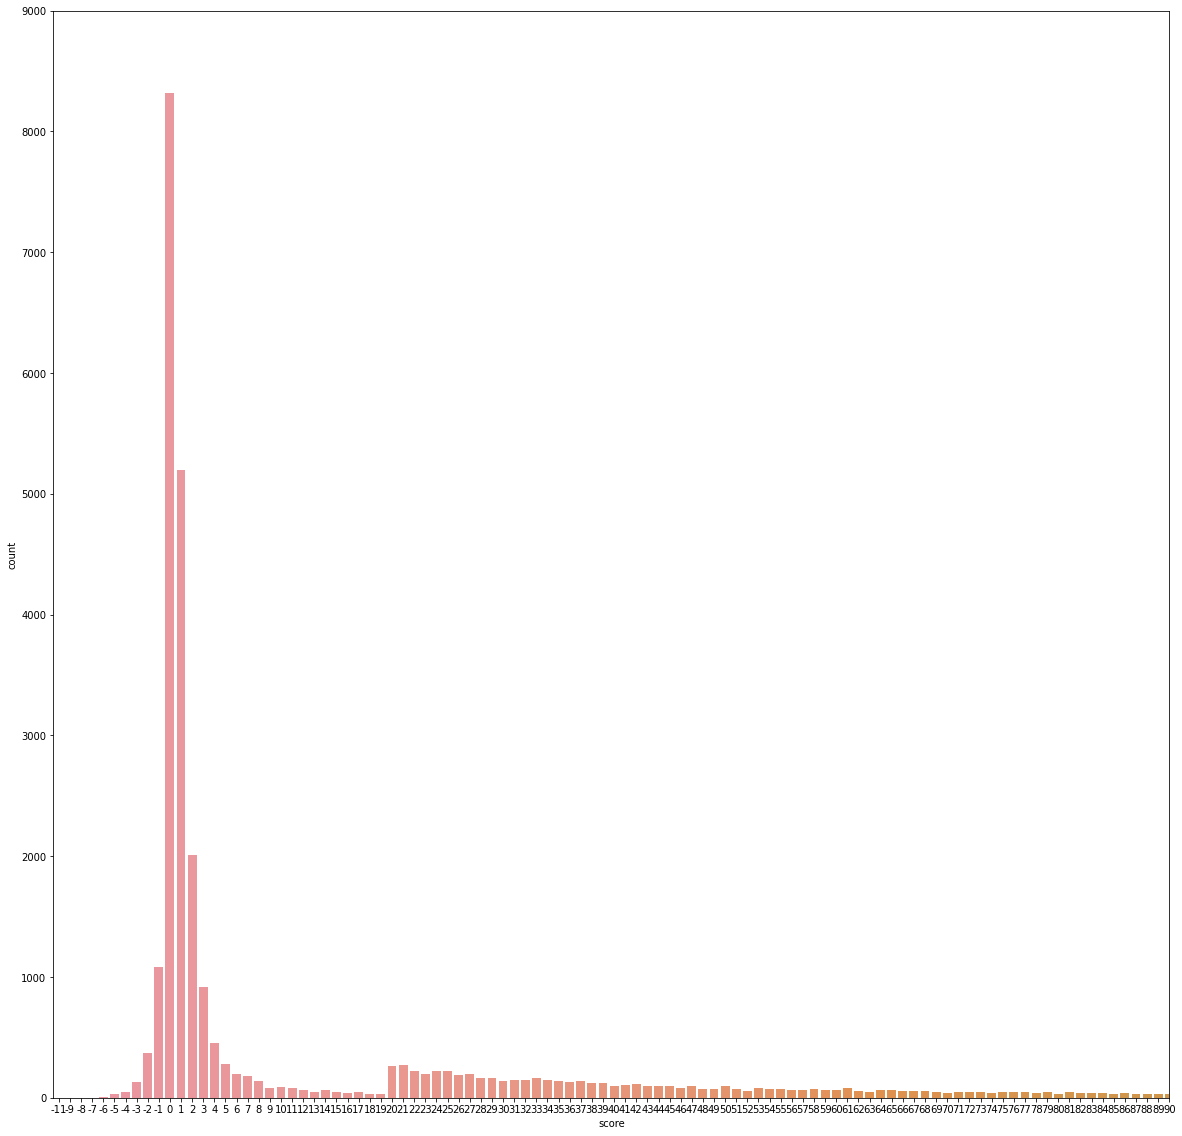

In [6]:
#### Histogram of distribution of outcome column "score"

f, ax = plt.subplots(figsize=(20,20))
sns.countplot(x='score', data=stackoverflow)
plt.xlim(None, 100) 
plt.ylim(0, 9000) 
plt.show()

In [46]:
### Cleaning the text

stopwords_nltk = nltk.corpus.stopwords.words('english')

In [47]:
print(stopwords_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [48]:
### Create own list of stopwords building on nltk

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "can't", "'i'd", "it's", "I've"]

In [49]:
### Prepare lemmatizer
lemmatizer = WordNetLemmatizer()

In [50]:
###  Define function that takes a whole sentence and outputs the lemmatized sentence

def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return " ".join(res_words)

In [51]:
### Prepare list of punctuations to be excluded in cleaning process

punctuation = ['&', '%', '§', '/', '(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.', ':', '_', '*', '|', ',', '+', ';', '@', '€', '$', '#', '==', '[',']', '{', '}', "`", '´', '=', "´´", '!', '°', '^', '--', "``", "''", '-', '"', "'", "?"]

In [52]:
### Write tailored preprocessing function to remove specific strings, code, stopwords and punctuation and to lemmatize words

def preprocessor(text_column):
    text_column = re.sub(r'<code>.*?</code>', ' ', text_column.lower())
    text_column = re.sub(r'<.*?>', ' ', text_column)
    text_column = re.sub(r'[( )]', ' ', text_column)
    ### Removing dots connecting words and at end of sentence
    text_column = " ".join(text_column.split("."))
    ### Removing backslash connecting words
    text_column = " ".join(text_column.split("\\"))
    ### Removing vertical slash connecting words
    text_column = " ".join(text_column.split("|"))
    ### Remove stopwords from sentences
    text_column = [w for w in text_column.split() if w not in stopwords]
    text_column = ' '.join(text_column)
    ### Clean each letter/token in a sentence
    token = [letter for letter in text_column if letter not in punctuation]
    text_column = ''.join(token)
    ### Lemmatize sentences
    text_column = lemmatize_sentence(text_column)
    ### Replace occurrences of single alphabet characters
    text_column = re.sub(r"\b[a-zA-Z]\b", "", text_column)
    return text_column

example_sentence = "<p> ´´HI myself 3945p0hfnds <p> n, <code> grnkgljhkge </code>I am singing. 'our' (testing) arbitrary & d lkögeaf_fewnefwl& can't c you're again tghghg.words.blub wildfly\modules\system\layers |tags|some more tags|blub"

preprocessor(example_sentence)

### TO DO: figure out how to remove unnecessary whitespace and quotation marks

'hi phfnds  sing our test arbitrary lkögeaffewnefwl  tghghg word blub wildfly module system layer tag tag blub'

In [53]:
### Separating target and text columns

excluded_cols = ['comment_count', 'creation_date', 'favorite_count', 'view_count', 'score', 'answer_count']
target_col = ['score_cat']
text_cols = [x for x in stackoverflow if x not in target_col + excluded_cols]

In [54]:
print(text_cols)

['question_title', 'question_text', 'tags', 'answer_text']


In [55]:
### Applying cleaning / preprocessing to all text columns

for var_name in text_cols:
    new_var = "%s_%s" % (var_name, "clean")
    stackoverflow[new_var] = stackoverflow[var_name].apply(preprocessor)

In [36]:
pd.set_option('display.max_colwidth', -1)

In [37]:
stackoverflow.head(20)

,score,question_title,question_text,answer_count,comment_count,creation_date,favorite_count,tags,view_count,answer_text,score_cat,question_title_clean,question_text_clean,tags_clean,answer_text_clean,answer_wordcount
0,0,How to avoid Bot repeating command in groups?,"<p>I created a new Telegram Bot which maintains a simple list. When I chat with the Bot directly (in PMs) the Bot works as intended.</p>\n\n<p><a href=""https://i.stack.imgur.com/Ou3xv.png"" rel=""nofollow noreferrer""><img src=""https://i.stack.imgur.com/Ou3xv.png"" alt=""Working as intended""></a></p>\n\n<p>I created this bot for a group of friends, so I added the bot to the group, and now, whenever I execute a command, the bot responds, but also repeats my command. Is there any way to avoid this behavior? </p>\n\n<p><a href=""https://i.stack.imgur.com/SGGut.png"" rel=""nofollow noreferrer""><img src=""https://i.stack.imgur.com/SGGut.png"" alt=""Bot in Group""></a></p>\n\n<p>I am using the python-telegram-bot API and sending messages using <code>update.message.reply_text('My message')</code></p>\n\n<p>Is this just intended behavior or is there any way to avoid the bot repeating the sent command?</p>",2,0,2019-08-23 14:05:29.463000+00:00,0.0,telegram-bot|python-telegram-bot,79,"<p>The bot only is replying message, not creating 2 messages.</p>\n\n<p>You should use send_message.</p>",bad,avoid bot repeat command group,create new telegram bot maintain simple list chat bot directly pms bot work intend create bot group friends added bot group now whenever execute command bot respond also repeat command way avoid behavior use pythontelegrambot api send message use intend behavior way avoid bot repeat send command,telegrambot pythontelegrambot,bot reply message create message use sendmessage,7
1,-3,how to host Asp.net core web application..?,"<p>I have more confusion with hosting my application. I Build my application in Asp.net core 3.1.2<br>\nafter the completion of my development, how to choose my hosting plans. there is so many options are there\nEg: shared hosting and Cloud Hosting Plans</p>\n\n<p>if I choose windows cloud Hosting, is it work for other os users. \nplease guide me. \n(this link => I plan to buy host )\n<a href=""https://www.asphostportal.com/Windows-Cloud-Hosting-Plans"" rel=""nofollow noreferrer"">https://www.asphostportal.com/Windows-Cloud-Hosting-Plans</a></p>",2,0,2020-04-27 22:38:03.737000+00:00,NaN,asp.net-core|shared-hosting|cloud-hosting,47,"<p>If choose their windows cloud hosting platform, your .net core will work fine since .net core running perfectly on Windows OS. You can go with this provider, they fully support .net core. </p>",bad,host asp net core web application,confusion host application build application asp net core completion development choose host plan many option eg share host cloud host plan choose window cloud host work user please guide link > plan buy host httpswww asphostportal comwindowscloudhostingplans,asp netcore sharedhosting cloudhosting,choose window cloud host platform net core work fine since net core run perfectly windows os go provider fully support net core,22
2,0,discord.ext.commands.errors.MissingRequiredArgument: guild is a required argument that is missing,"<p>i would like make a command for set permissions to all text channels, but i have a few difficulty to make this command</p>\n\n<p>I've tried to many times but i not remember what i must\nplease help me, i need a code</p>\n\n<p><strong>my code:</strong></p>\n\n<pre><code>@bot.command()\nasync def close_all(ctx, *, guild: discord.Guild):\n for chan in guild.channels:\n await guild.channels.set_permissions(ctx.guild.default_role, send_messages=False)\n</code></pre>\n\n<p><strong>the error:</strong>\n<code>guild is a required argument that is missing.</code></p>",2,0,2020-02-21 01:10:53.553000+00:00,NaN,discord.py|discord.py-rewrite,103,"<p>What you're doing right now, is <strong>requiring the guild as an argument for your command</strong> so what the b

In [60]:
### Save preprocessed data to a csv file

base_path = Path("__file__").parent
full_path = (base_path / "../../data/processed/stackoverflow_preprocessed.csv").resolve()
stackoverflow.to_csv(os.path.join(full_path))